In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
M_data = pd.read_csv(r"C:\Users\Tanaya\Desktop\matches.csv")

In [3]:
D_data = pd.read_csv(r"C:\Users\Tanaya\Desktop\deliveries.csv")

In [4]:
M_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
M_data['team1'].value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [6]:
def n_c(data):
  if data =='Delhi Daredevils':
    data = 'Delhi Capitals'
  elif data == 'Deccan Chargers':
    data = 'Sunrisers Hyderabad'
  elif data == 'Rising Pune Supergiant' or data == 'Pune Warriors':
    data = 'Rising Pune Supergiants'
  return data

SyntaxError: invalid non-printable character U+00A0 (2898178898.py, line 8)

In [ ]:
M_data['team1']=M_data['team1'].apply(lambda x:n_c(x))
M_data['team2']=M_data['team2'].apply(lambda x:n_c(x))
M_data['toss_winner']=M_data['toss_winner'].apply(lambda x:n_c(x))
M_data['winner']=M_data['winner'].apply(lambda x:n_c(x))


D_data['batting_team']=D_data['batting_team'].apply(lambda x:n_c(x))
D_data['bowling_team']=D_data['bowling_team'].apply(lambda x:n_c(x))

In [ ]:
M_data.head(8)

In [ ]:
M_data.team2.unique()

In [ ]:
M_data.replace(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kochi Tuskers Kerala'],['RCB','RPS','KKR','KXIP','DC','SRH','MI','GL','RR','CSK','KTK'],inplace=True)
D_data.replace(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kochi Tuskers Kerala'],['RCB','RPS','KKR','KXIP','DC','SRH','MI','GL','RR','CSK','KTK'],inplace=True)

In [ ]:
M_data['team1'].unique()

In [ ]:
M_data.isnull().sum()

In [7]:
import pandas as pd
import numpy as np
M_data = M_data.drop(columns=['umpire1','umpire2','umpire3'],axis=1)
#M_data['city'].fillna('Not known',inplace=True)
#M_data['winner'].fillna('Not known',inplace=True)
#M_data['player_of_match'].fillna('Not known',inplace=True)

In [8]:
M_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
dtype: int64

In [9]:
M_data.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

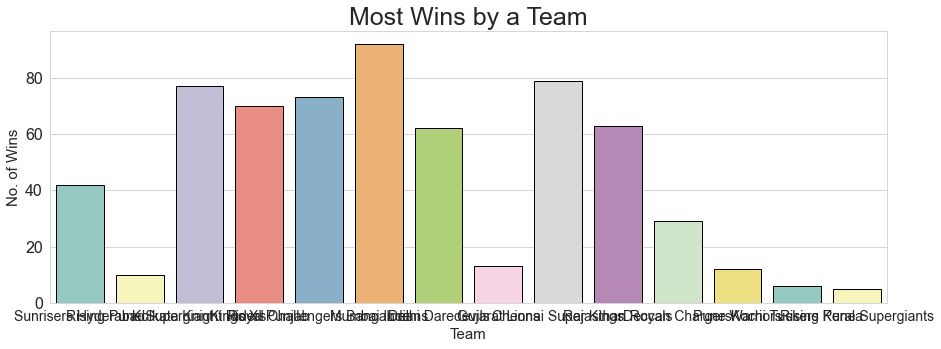

In [10]:
plt.figure(figsize=(15,5))

sns.set_style('whitegrid')

sns.countplot(x=M_data['winner'],palette='Set3',edgecolor='black')

plt.title('Most Wins by a Team',size=25)
plt.xlabel('Team',size=15)
plt.ylabel('No. of Wins',size=15)
plt.yticks(size=16)
plt.xticks(size=14)
plt.show

In [11]:
most_mom = M_data['player_of_match'].value_counts().head(10)
most_mom

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

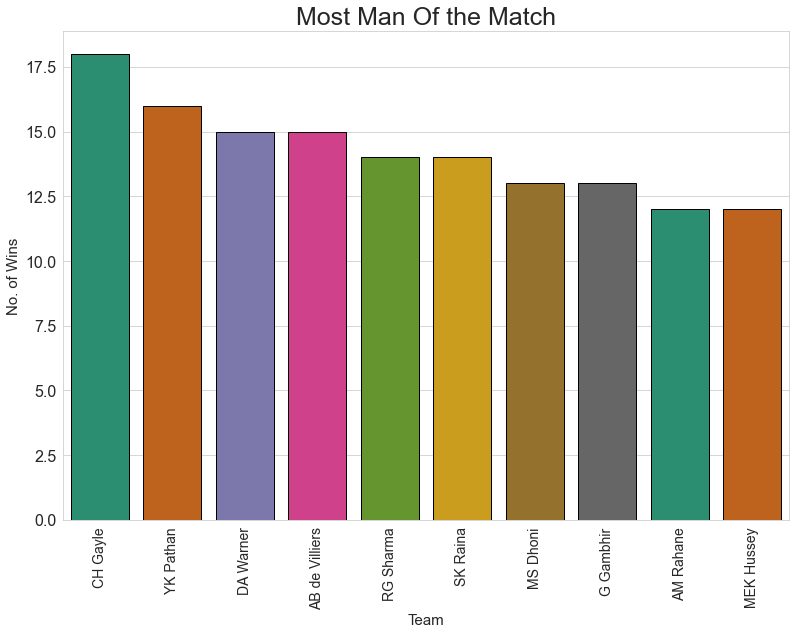

In [12]:
most_mom = M_data['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns=['Player','No. of awards']

plt.figure(figsize=(13,9))

sns.barplot(x=most_mom['Player'],y=most_mom['No. of awards'],palette='Dark2',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most Man Of the Match',size=25)
plt.xlabel('Team',size=15)
plt.ylabel('No. of Wins',size=15)
plt.yticks(size=16)
plt.xticks(size=14)
plt.show()

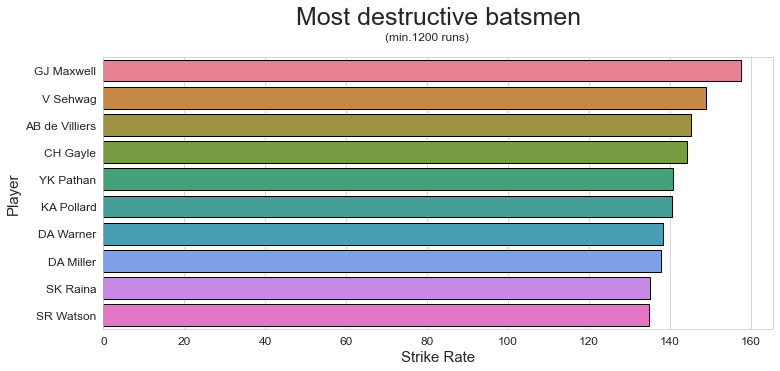

In [13]:
strike_rate=D_data.groupby(['batsman']).batsman_runs.sum().reset_index()

strike_rate['balls']=D_data.groupby(['batsman']).ball.count().reset_index()['ball']

strike_rate['rate']=strike_rate['batsman_runs']/strike_rate['balls']*100

strike_rate=strike_rate[strike_rate['batsman_runs']>=1200].sort_values(by=['rate'],ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=strike_rate['rate'],y=strike_rate['batsman'],palette='husl',edgecolor='black')
plt.title('Most destructive batsmen\n',size=25)
plt.suptitle('\n(min.1200 runs)')
plt.ylabel('Player',size=15)
plt.xlabel('Strike Rate',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [14]:
D_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

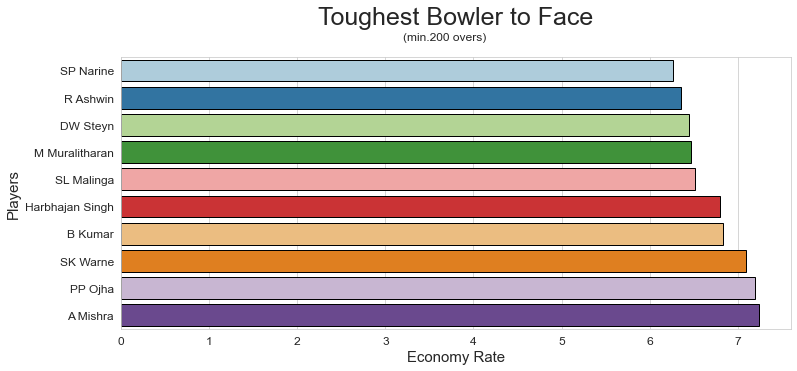

In [15]:
economy_rate=D_data.groupby(['bowler']).sum()

economy_rate['over']=D_data['bowler'].value_counts()/6

economy_rate['runs']=economy_rate['wide_runs']+economy_rate['noball_runs']+economy_rate['batsman_runs']

economy_rate=economy_rate[economy_rate['over']>=200]

economy_rate['rate']=economy_rate['runs']/economy_rate['over']

economy_rate=economy_rate.sort_values(by=['rate'],ascending=True).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=economy_rate['rate'],y=economy_rate.index,palette='Paired',edgecolor='black')
plt.title('Toughest Bowler to Face\n',size=25)
plt.suptitle('\n(min.200 overs)')
plt.ylabel('Players',size=15)
plt.xlabel('Economy Rate',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

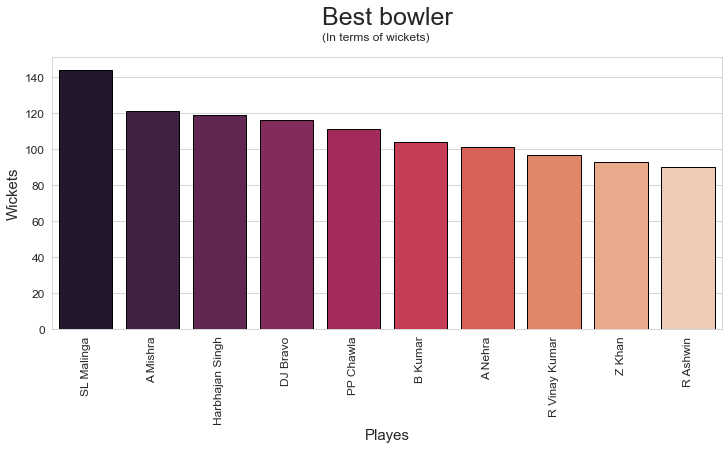

In [16]:
dismissal=['caught','bowled','caught and bowled','hit wicket','ibw','stumped']

best_bowler=D_data.loc[D_data['dismissal_kind'].isin(dismissal)]

best_bowler=best_bowler['bowler'].value_counts().reset_index().head(10)

best_bowler.columns=['bowler','wickets']

plt.figure(figsize=(12,5))
sns.barplot(x=best_bowler['bowler'],y=best_bowler['wickets'],palette='rocket',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best bowler\n',size=25)
plt.suptitle('\n(In terms of wickets)')
plt.ylabel('Wickets',size=15)
plt.xlabel('Playes',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

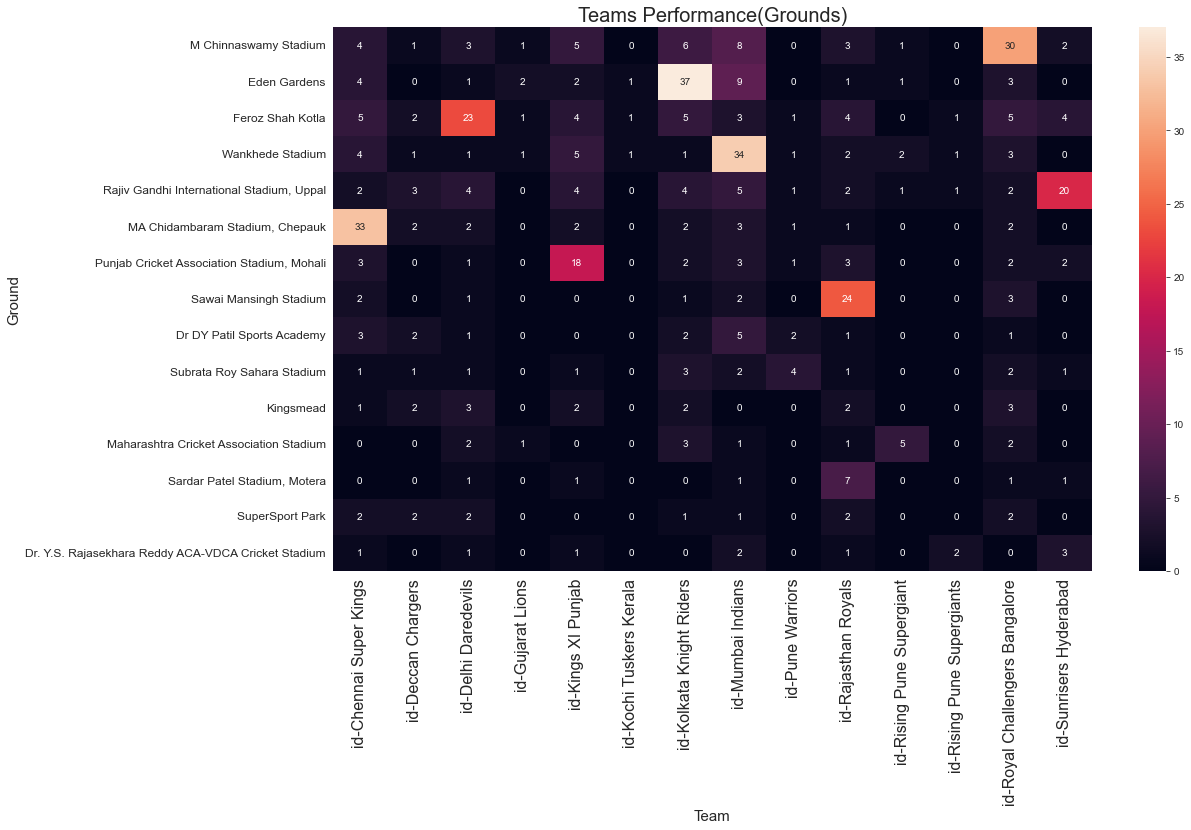

In [19]:
venue=M_data.groupby(['venue','winner']).count()

venue=venue.iloc[:,:1].reset_index()

venue=venue.pivot('venue','winner')

venue.fillna(0,inplace=True)

venue['total']=venue.sum(axis=1,skipna=False)
venue['total']
venue=venue.sort_values(by=['total'],ascending=False).head(15)

venue.drop(['total'],axis=1,inplace=True)

sns.set_style('dark')
plt.figure(figsize=(17,10))
sns.heatmap(data=venue,annot=True,cmap='rocket')
plt.xlabel('Team',size=15)
plt.ylabel('Ground',size=15)
plt.yticks(size=12)
plt.xticks(size=16)
plt.title('Teams Performance(Grounds)',size=20)
plt.show()